# Import Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: "%.4f"%x)

import warnings
warnings.filterwarnings("ignore")

# Import Dataset

In [ ]:
bodyfat = pd.read_csv("/content/bodyfat.csv")
df = bodyfat.copy()
df.head()

Density  BodyFat  Age   Weight  Height    Neck    Chest  Abdomen      Hip   Thigh    Knee   Ankle  Biceps  Forearm   Wrist
0   1.0708  12.3000   23 154.2500 67.7500 36.2000  93.1000  85.2000  94.5000 59.0000 37.3000 21.9000 32.0000  27.4000 17.1000
1   1.0853   6.1000   22 173.2500 72.2500 38.5000  93.6000  83.0000  98.7000 58.7000 37.3000 23.4000 30.5000  28.9000 18.2000
2   1.0414  25.3000   22 154.0000 66.2500 34.0000  95.8000  87.9000  99.2000 59.6000 38.9000 24.0000 28.8000  25.2000 16.6000
3   1.0751  10.4000   26 184.7500 72.2500 37.4000 101.8000  86.4000 101.2000 60.1000 37.3000 22.8000 32.4000  29.4000 18.2000
4   1.0340  28.7000   24 184.2500 71.2500 34.4000  97.3000 100.0000 101.9000 63.2000 42.2000 24.0000 32.2000  27.7000 17.7000

In [ ]:
df = df.drop("Density", axis= 1)

In [ ]:
df.head()

BodyFat  Age   Weight  Height    Neck    Chest  Abdomen      Hip   Thigh    Knee   Ankle  Biceps  Forearm   Wrist
0  12.3000   23 154.2500 67.7500 36.2000  93.1000  85.2000  94.5000 59.0000 37.3000 21.9000 32.0000  27.4000 17.1000
1   6.1000   22 173.2500 72.2500 38.5000  93.6000  83.0000  98.7000 58.7000 37.3000 23.4000 30.5000  28.9000 18.2000
2  25.3000   22 154.0000 66.2500 34.0000  95.8000  87.9000  99.2000 59.6000 38.9000 24.0000 28.8000  25.2000 16.6000
3  10.4000   26 184.7500 72.2500 37.4000 101.8000  86.4000 101.2000 60.1000 37.3000 22.8000 32.4000  29.4000 18.2000
4  28.7000   24 184.2500 71.2500 34.4000  97.3000 100.0000 101.9000 63.2000 42.2000 24.0000 32.2000  27.7000 17.7000

In [ ]:
def check_df(dataframe, head=5):
  print(20 * "*", "HEAD", 20 * "*")
  print(dataframe.head(head))
  print(20 * "*", "TAIL", 20 * "*")
  print(dataframe.tail(head))
  print(20 * "*", "SHAPE", 20 * "*")
  print(dataframe.shape)
  print(20 * "*", "TYPE", 20 * "*")
  print(dataframe.dtypes)
  print(20 * "*", "NA", 20 * "*")
  print(dataframe.isnull().sum())
  print(20 * "*", "QUARTILES", 20 * "*")
  print(dataframe.describe([0, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 1]).T)

In [ ]:
check_df(df)

******************** HEAD ********************
   BodyFat  Age   Weight  Height    Neck    Chest  Abdomen      Hip   Thigh    Knee   Ankle  Biceps  Forearm   Wrist
0  12.3000   23 154.2500 67.7500 36.2000  93.1000  85.2000  94.5000 59.0000 37.3000 21.9000 32.0000  27.4000 17.1000
1   6.1000   22 173.2500 72.2500 38.5000  93.6000  83.0000  98.7000 58.7000 37.3000 23.4000 30.5000  28.9000 18.2000
2  25.3000   22 154.0000 66.2500 34.0000  95.8000  87.9000  99.2000 59.6000 38.9000 24.0000 28.8000  25.2000 16.6000
3  10.4000   26 184.7500 72.2500 37.4000 101.8000  86.4000 101.2000 60.1000 37.3000 22.8000 32.4000  29.4000 18.2000
4  28.7000   24 184.2500 71.2500 34.4000  97.3000 100.0000 101.9000 63.2000 42.2000 24.0000 32.2000  27.7000 17.7000
******************** TAIL ********************
     BodyFat  Age   Weight  Height    Neck    Chest  Abdomen      Hip   Thigh    Knee   Ankle  Biceps  Forearm   Wrist
247  11.0000   70 134.2500 67.0000 34.9000  89.2000  83.6000  88.8000 49.6000 34.8000

# Analysis Categorical and Numerical Variables

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["uint8", "int64", "float64"]]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category", "object"]]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8", "int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    return cat_cols, num_cols, cat_but_car, num_but_cat

In [ ]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)
print(f"Observation: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")
print(f"Cat_Cols: {len(cat_cols)}")
print(f"Num_Cols: {len(num_cols)}")
print(f"Cat_But_Car: {len(cat_but_car)}")
print(f"Num_But_cat: {len(num_but_cat)}")

Observation: 252
Variables: 14
Cat_Cols: 0
Num_Cols: 14
Cat_But_Car: 0
Num_But_cat: 0


In [ ]:
def num_summary(dataframe, num_col, plot=False):
    print(f"####################### {num_col} #######################")
    quantiles = [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[num_col].describe(quantiles).T)

    if plot:
        dataframe[num_col].hist(bins=20)
        plt.xlabel(num_col)
        plt.title(num_col)
        plt.show(block=True)

In [ ]:
def num_summary_df(dataframe):
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)
    for col in num_cols:
        num_summary(dataframe, col, plot=True)

In [ ]:
def plot_num_summary(dataframe):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
  plt.figure(figsize=(20, 20))
  for index, col in enumerate(num_cols):
    plt.subplot(7,2, index+1)
    plt.tight_layout()
    dataframe[col].hist(bins=20)
    plt.title(col)

In [ ]:
plot_num_summary(df)

NameError: name 'plot_num_summary' is not defined

# Correlation Analysis

In [ ]:
def correlated_cols(dataframe, plot=False, jointplot=False):
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8", "int64", "float64"]]
  corr = dataframe[num_cols].corr()
  if plot:
    sns.set(rc={"figure.figsize" : (18, 23)})
    sns.heatmap(corr, cmap = "RdBu", annot = True, fmt = ".2f")
    plt.show()
  sns.pairplot(dataframe, kind="reg");
  if jointplot:
    for col in num_cols:
      sns.jointplot(x=col, y="BodyFat", data=dataframe, kind="reg")

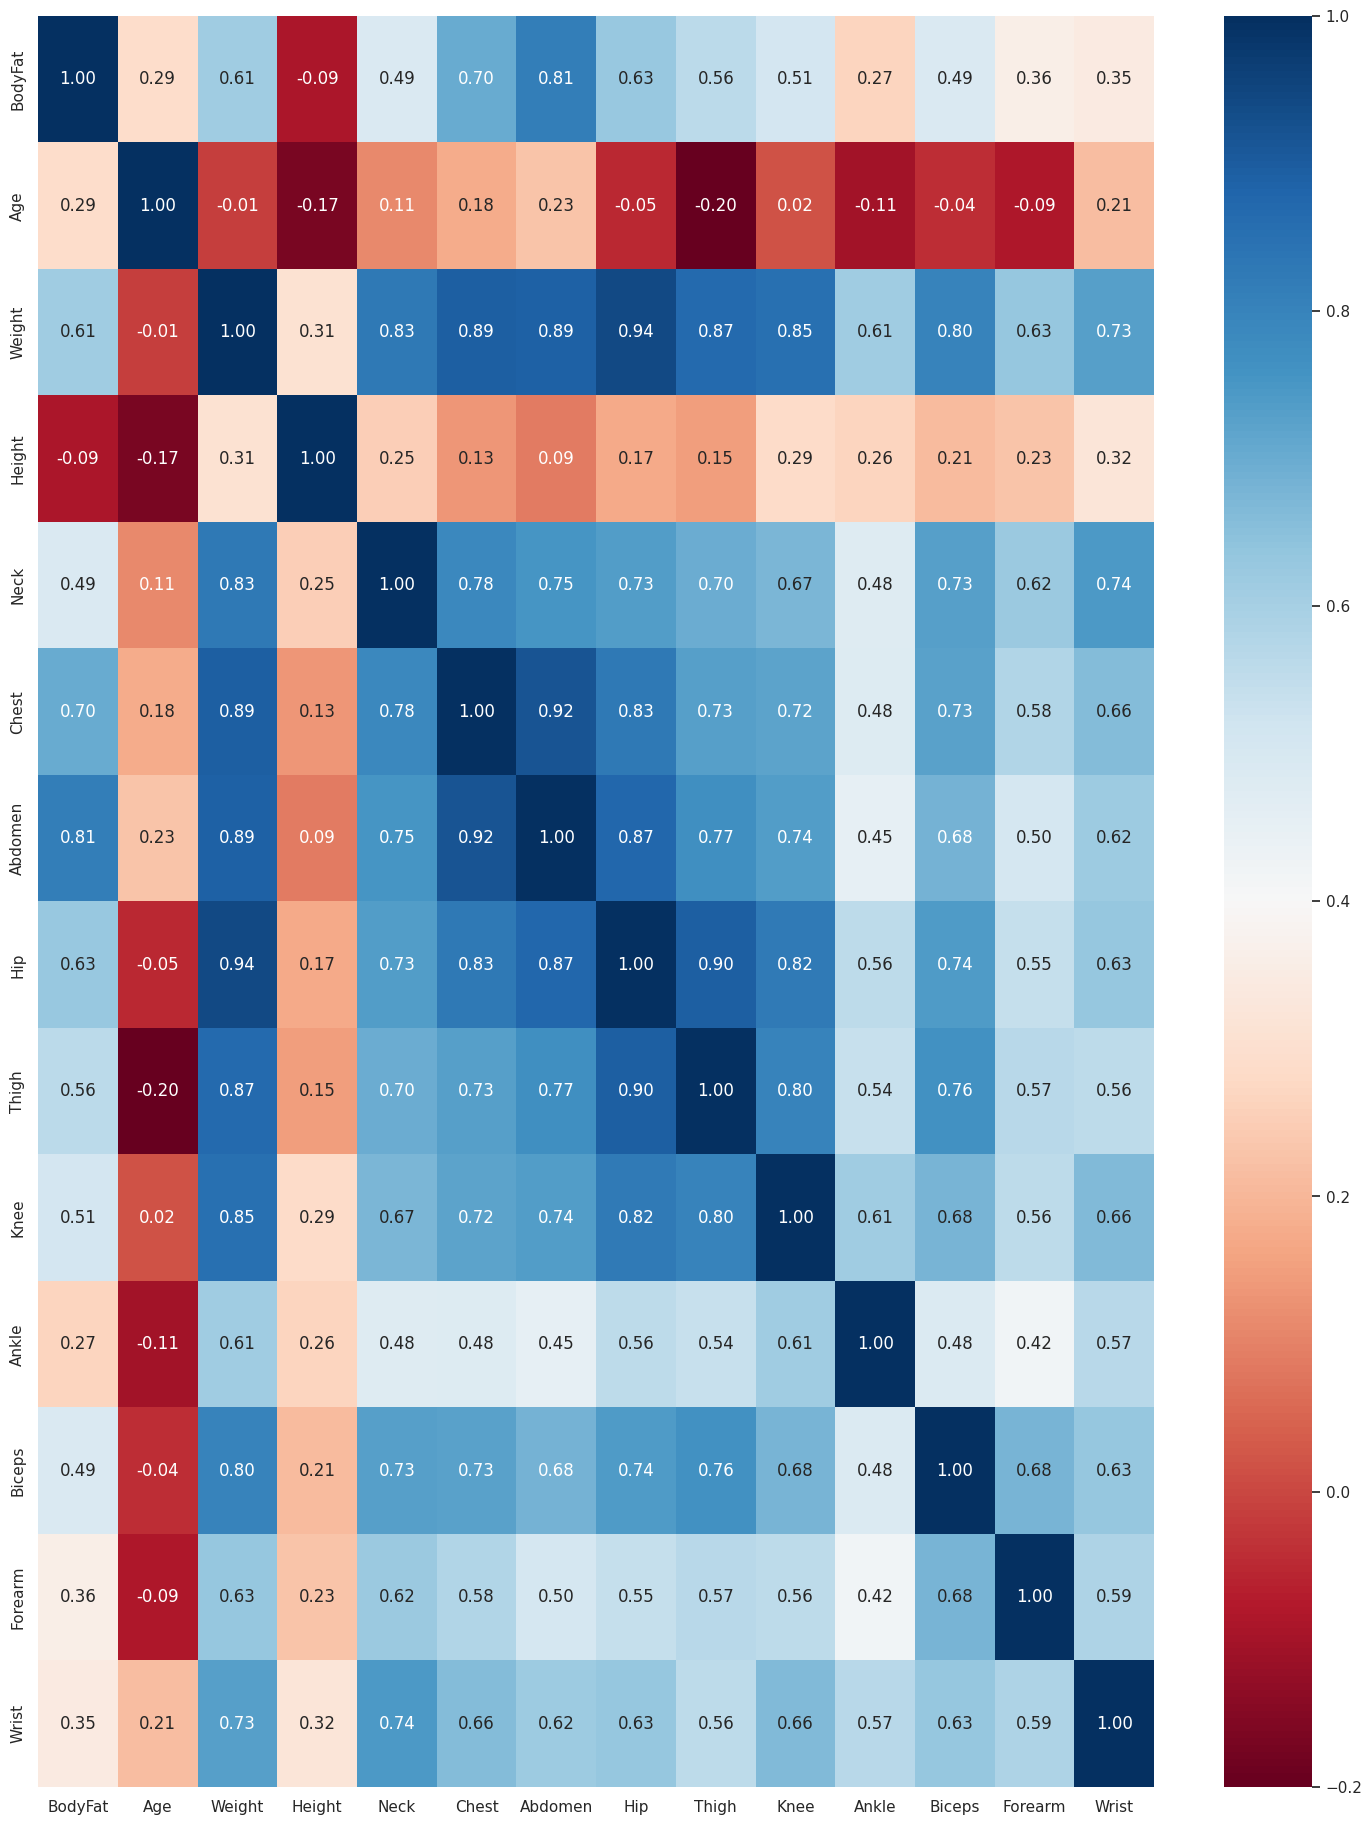

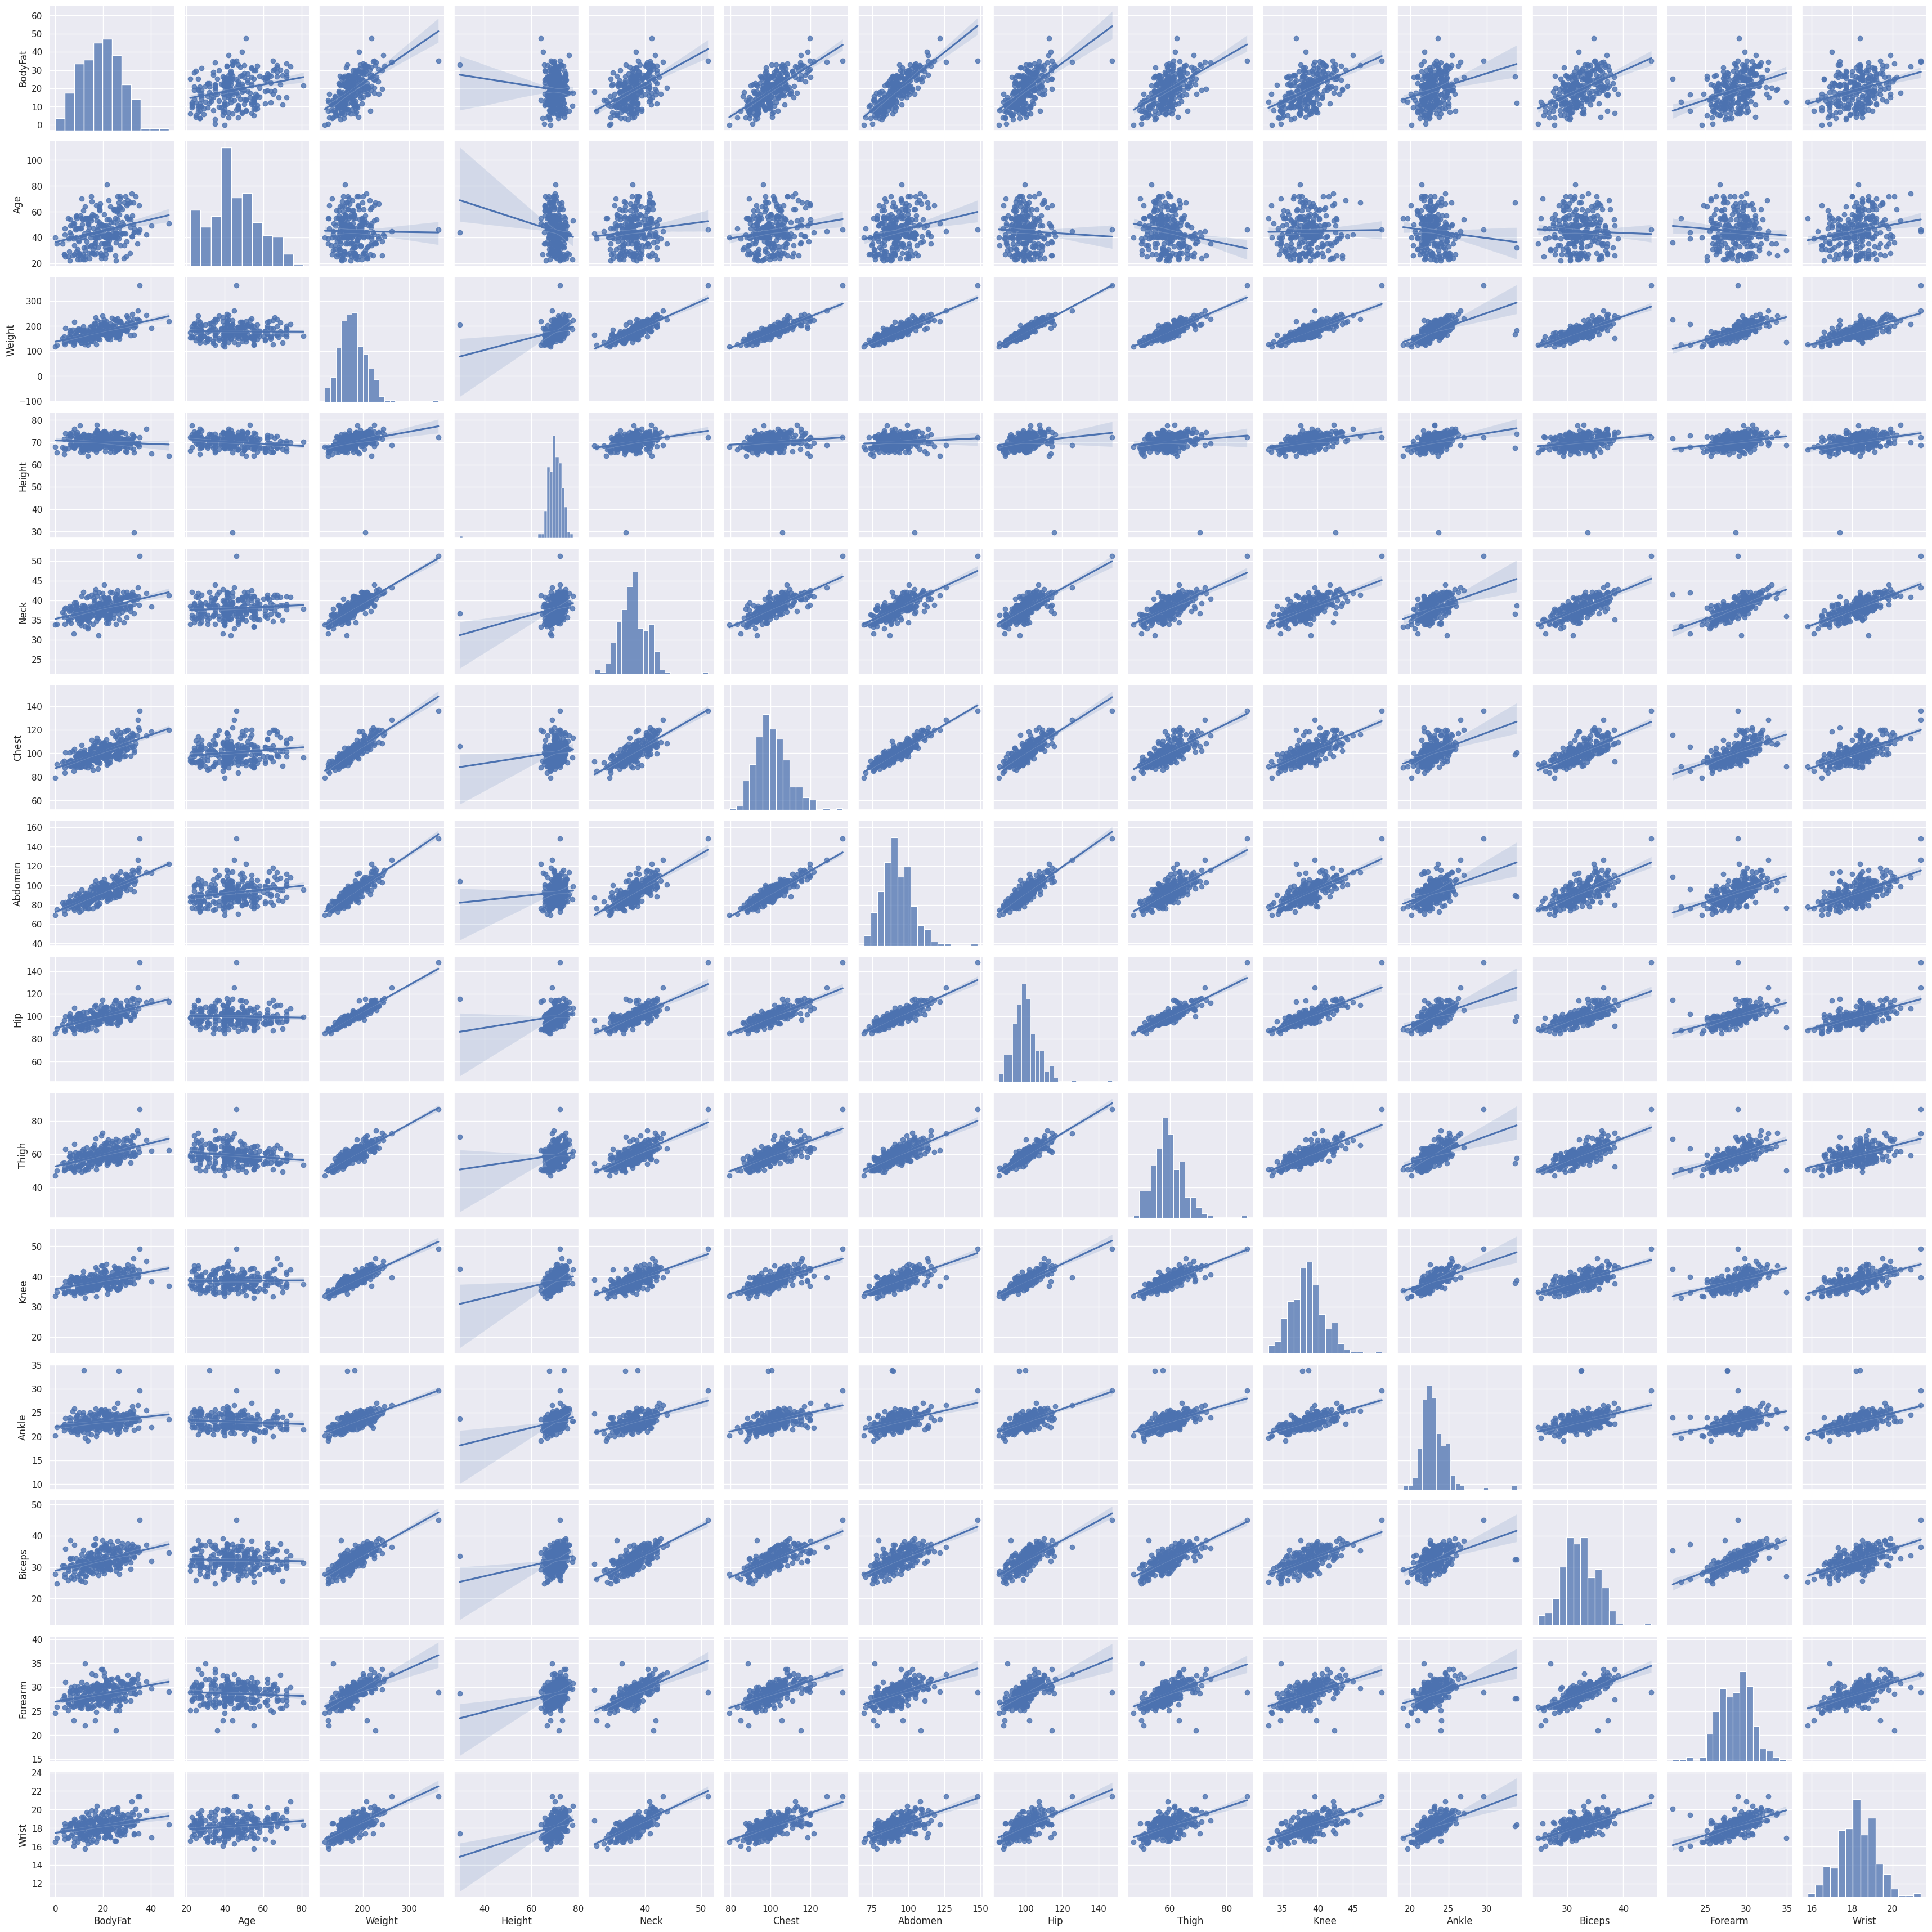

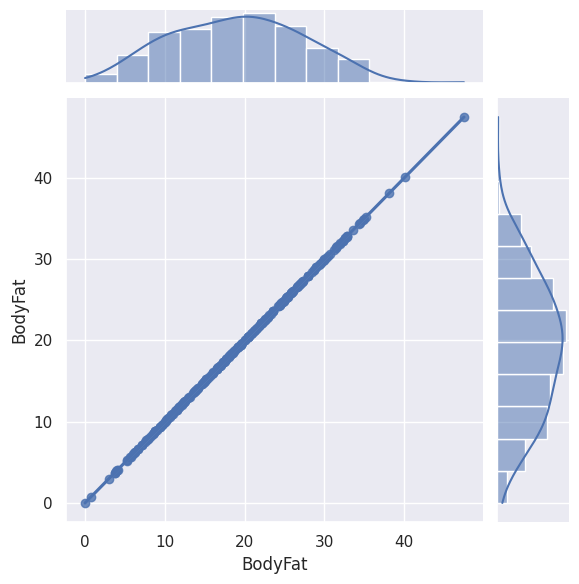

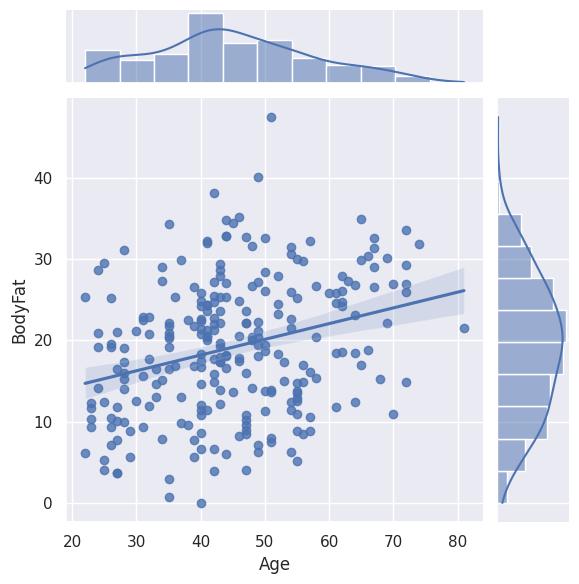

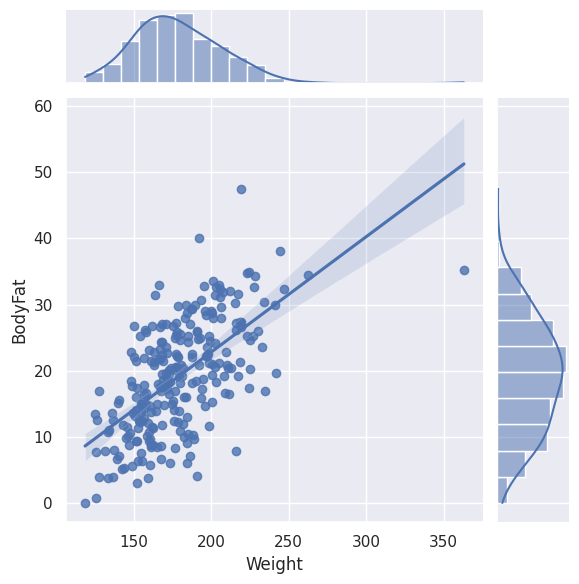

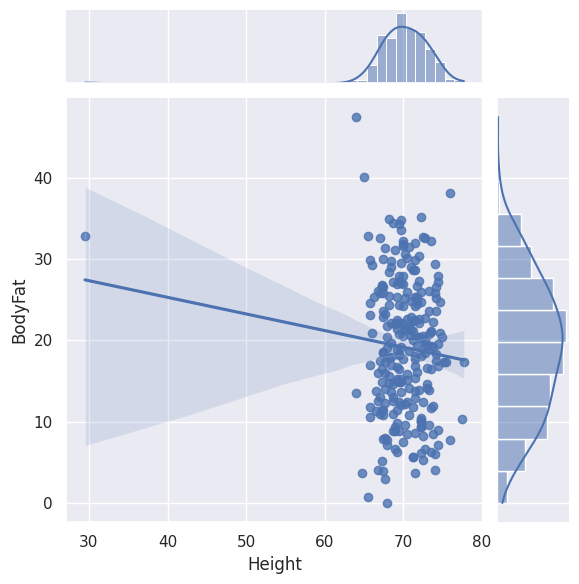

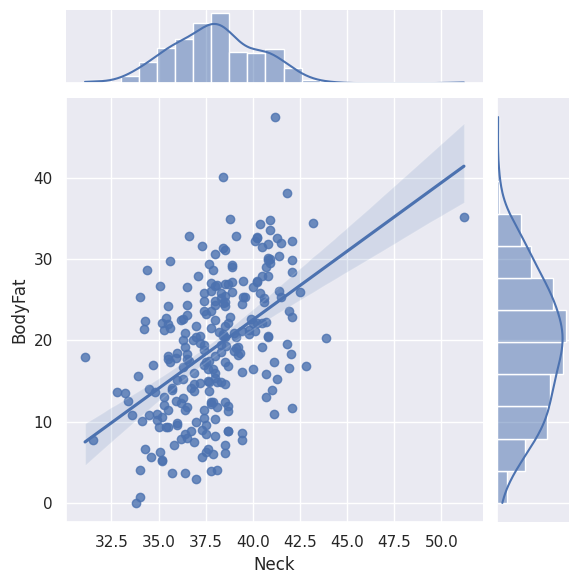

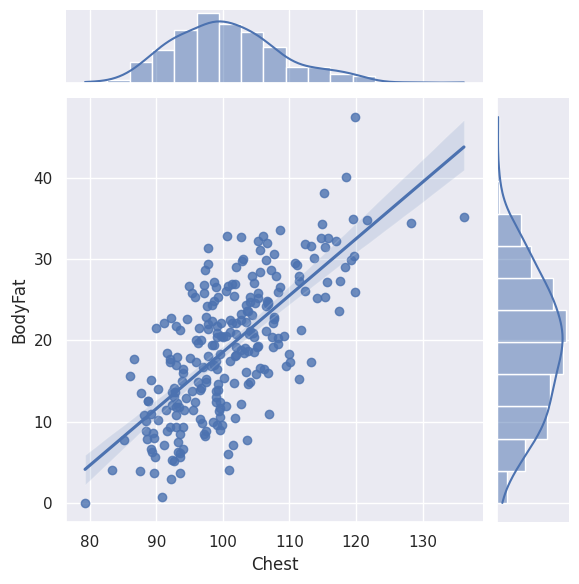

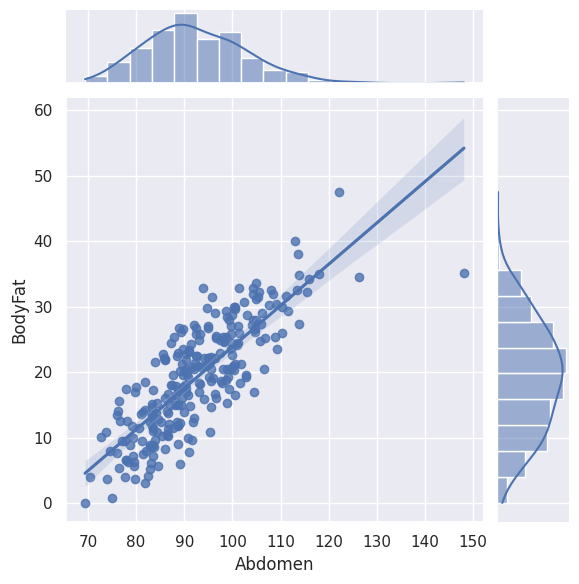

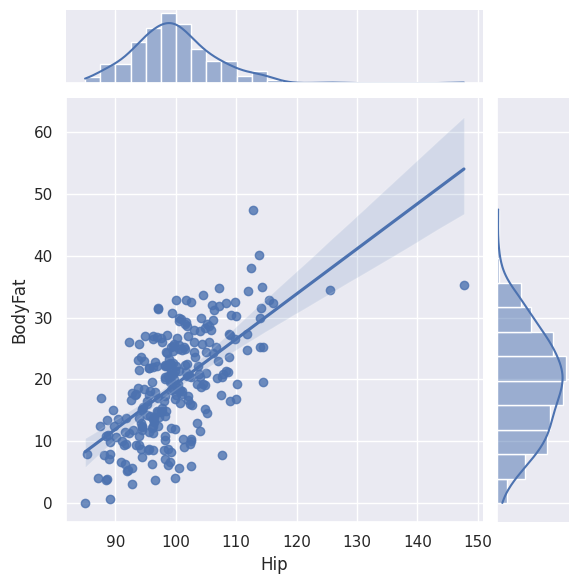

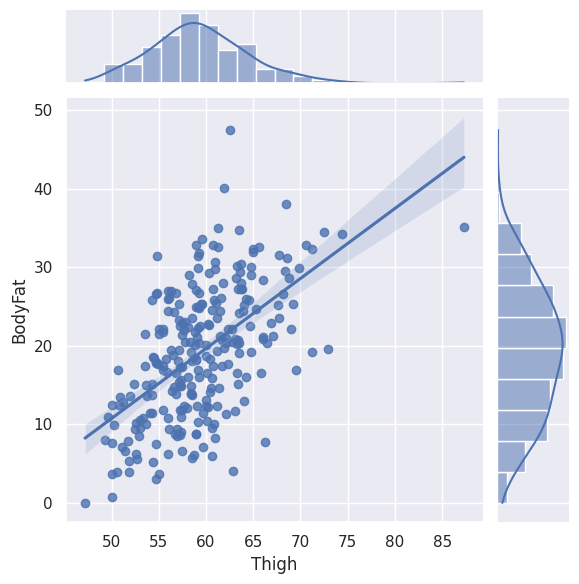

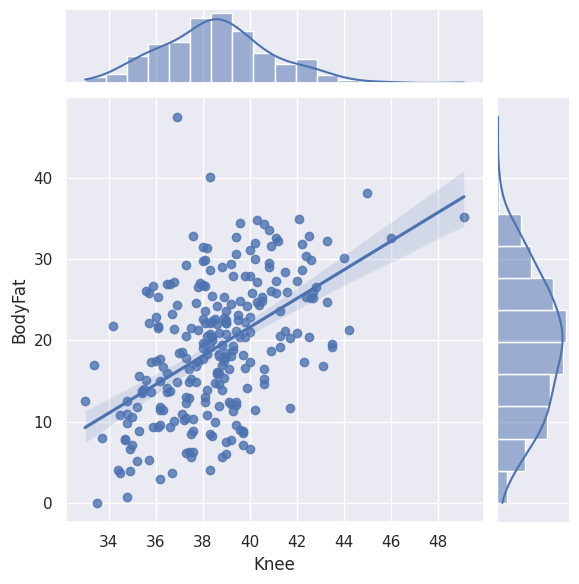

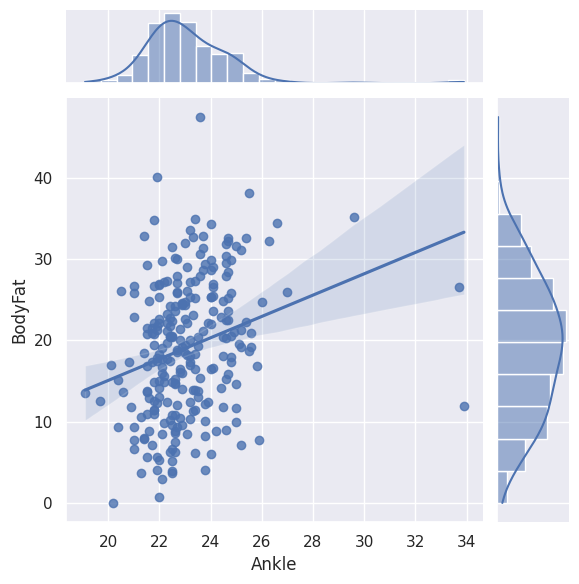

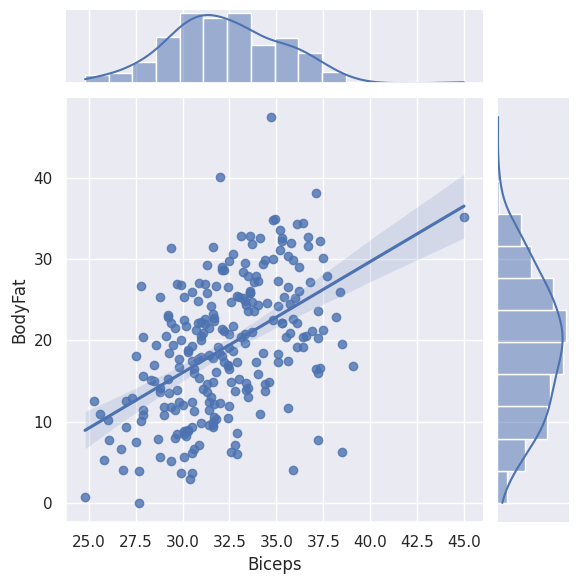

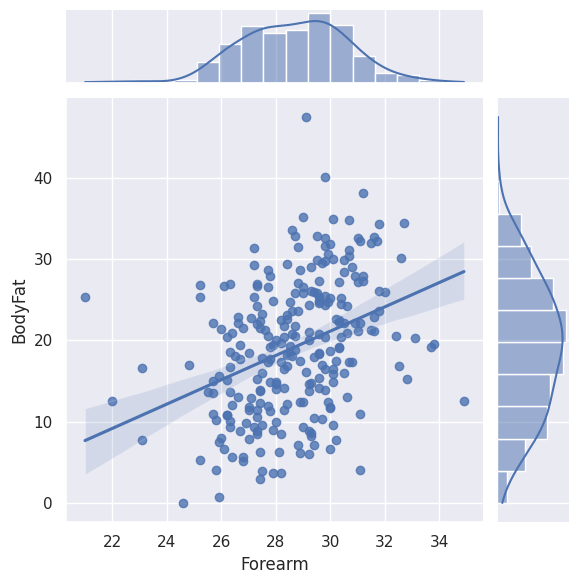

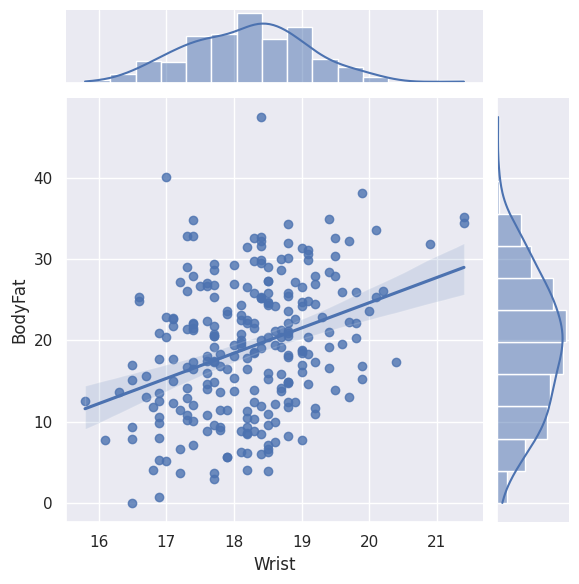

In [ ]:
correlated_cols(df, plot = True, jointplot=True)

In [ ]:
def high_correlated_cols(dataframe, corr_th = 0.90, plot=False):
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8", "int64", "float64"]]
  corr = df[num_cols].corr()
  corr_matrix = corr.abs()
  upper_triangular_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
  drop_list = [col for col in upper_triangular_matrix.columns if any(upper_triangular_matrix[col] > corr_th)]
  if drop_list == []:
    print("After correlation analysis, we do not need to remove variables.")
  if plot:
    sns.set(rc={"figure.figsize" : (18, 13)})
    sns.heatmap(corr, cmap = "RdBu", annot = True, fmt = ".2f")
    plt.show()

  return drop_list


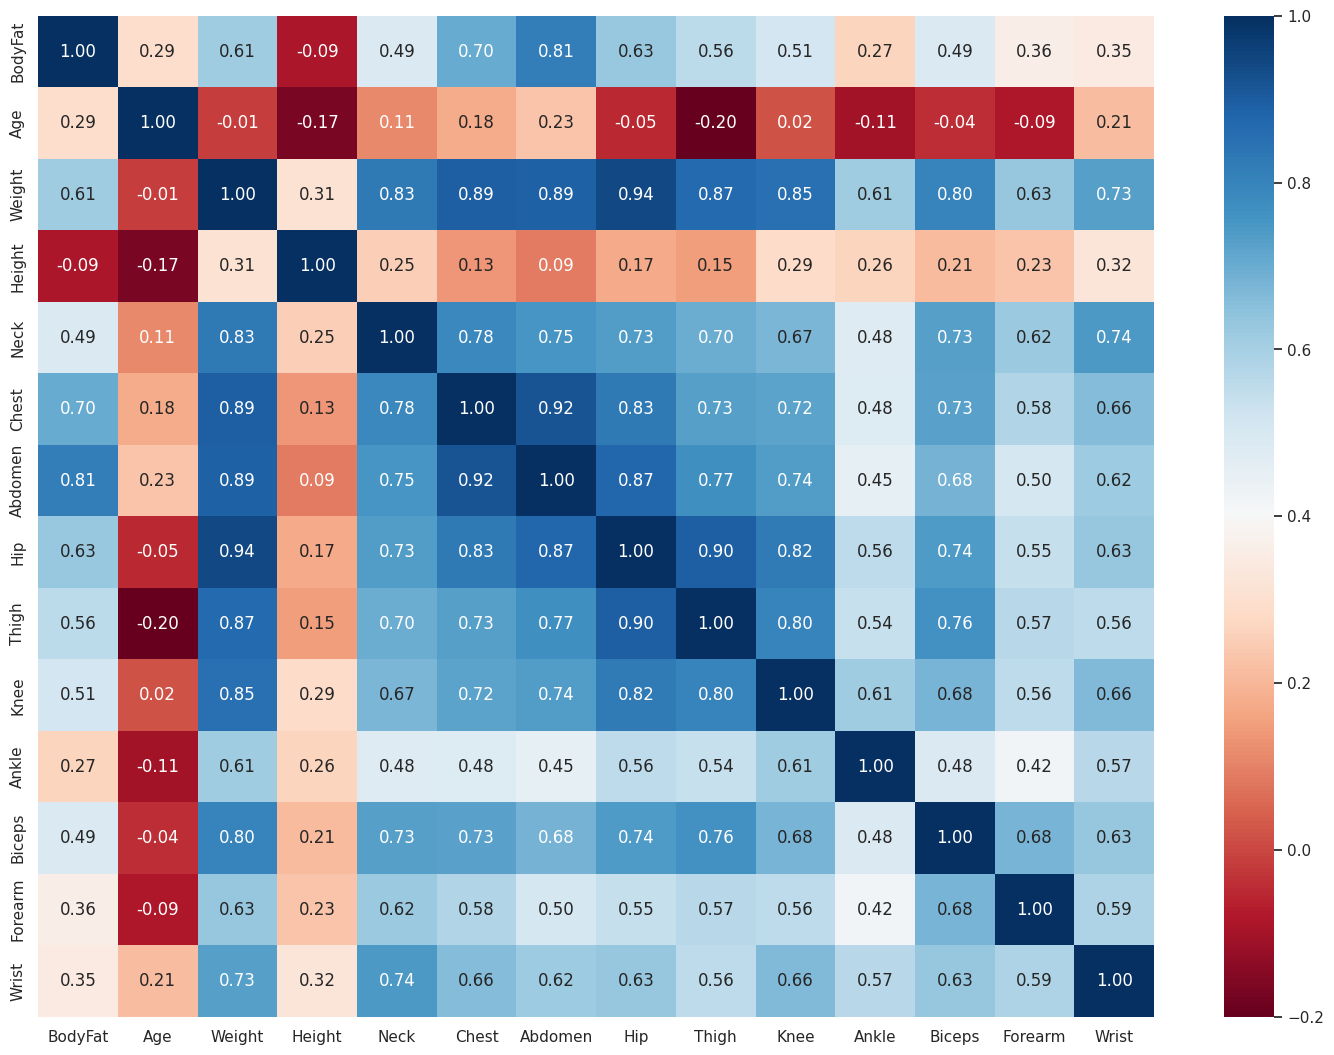

['Abdomen', 'Hip']

In [ ]:
high_correlated_cols(df, plot=True)

# Plot Distplot, Boxplot, Probplot  

In [ ]:
def plot_dist_box_prob_plot(dataframe):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
  fig,ax = plt.subplots(14,3,figsize=(30,90))
  sns.set(font_scale=2.5)
  for index, col in enumerate(num_cols):
    sns.distplot(dataframe[col],ax=ax[index,0])
    sns.boxplot(dataframe[col],ax=ax[index,1])
    stats.probplot(dataframe[col],plot=ax[index,2])
  fig.tight_layout()
  fig.subplots_adjust(top=0.95)
  plt.suptitle("Visualizing Continuous Columns")

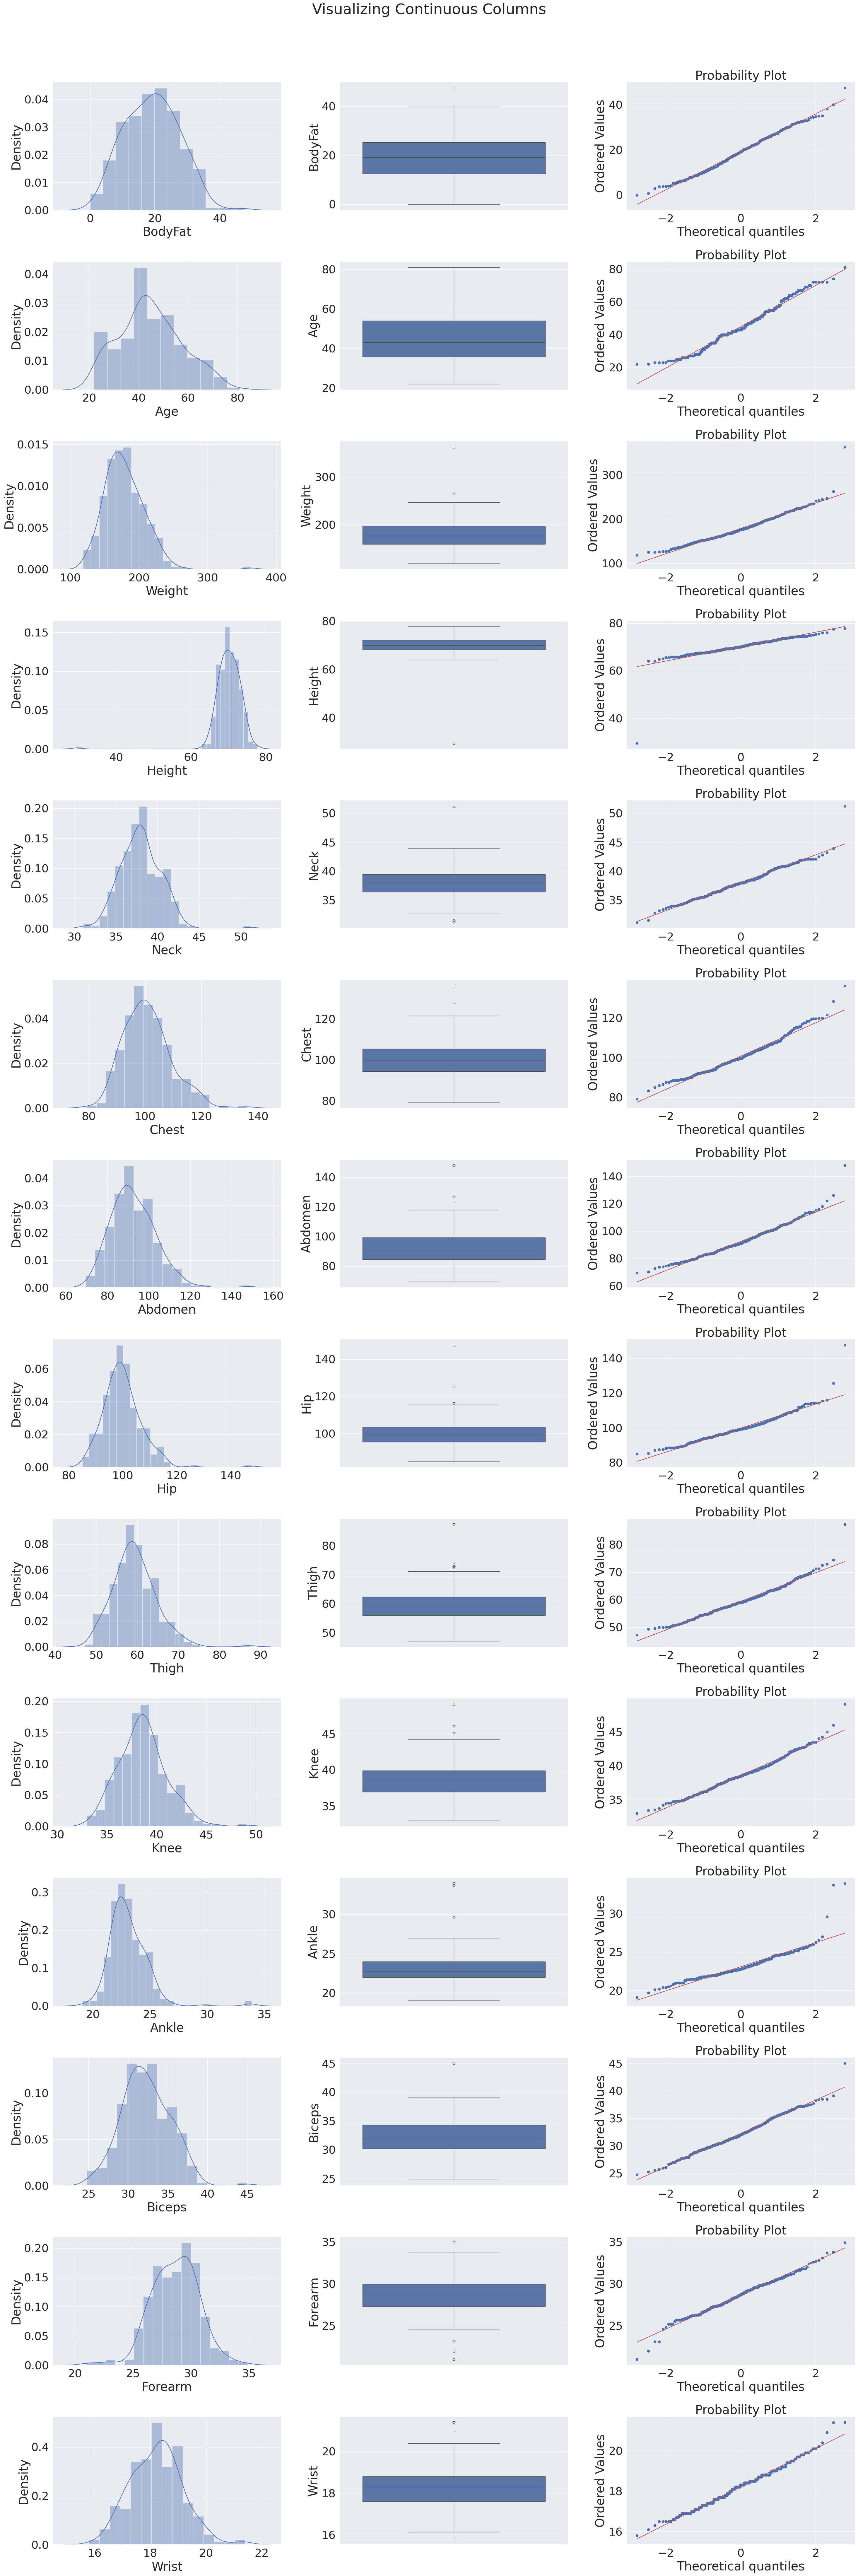

In [ ]:
plot_dist_box_prob_plot(df)